In [5]:
import networkx as nx
import numpy as np

Independent cascade model
---
**TODO**
- Set weight proba pour propagate neighbours

In [68]:
def propagate_neighbours(graph:nx.Graph, new_active, p, seed=None):
    if seed:
        np.random.seed(seed)
        
    # Get all neightbors
    neighbors = []
    for node in new_active:
        neighbors += g.neighbors(node)
    neighbors = list(set(neighbors)) # Keep unique neighbors
    
    # Put the weight sum for each neighbor
    neighbors_count = {n:0 for n in neighbors}
    for u, v, w in graph.edges.data():
        if u in new_active:
            w = w.get("weight", 1)
            neighbors_count[v] += w

    
    # Get the probability for each node 
    neighbors_prob = list(neighbors_count.values())
    sum_prob = sum(neighbors_prob)
    if sum_prob > 0:
        neighbors_prob = [raw_prob / sum_prob for raw_prob in neighbors_prob]# Normalise
    
    activation = np.random.uniform(0, 1, size=len(neighbors))
    activation = neighbors_prob*activation < p
    
    activated_neighbors = list(np.extract(activation, neighbors))
    
    return activated_neighbors

def independent_cascade_model(graph:nx.Graph, activated_nodes, p=.2, seed=None):
    new_active = activated_nodes[:]
    list_active = activated_nodes[:]
    while new_active:
        activated_neighbors = propagate_neighbours(graph, new_active, p=p, seed=seed)
        new_active = list(set(activated_neighbors) - set(list_active))
        list_active  += new_active
    
    spread = len(list_active)

    return {'spread':spread, 'list_active':list_active}

Influence maximisation
---

**TODO**
- fonction génératrice de edges actifs
- fonction de sum sur un graph des voisins infectés
- fonction sum global sur n graph avec fonction du dessus
- greedy

In [ ]:
def n_independent_cascade_model(graph:nx.Graph, activated_nodes, n, p=.2, seed_list=None):
    if seed_list is None:
        seed_list = [None]*n
    spread_sum = 0
    for seed in seed_list:
        icm_dict = independent_cascade_model(g, activated_nodes, p=p, seed=seed)
        spread_sum += icm_dict.get('spread')
    return spread_sum

def greedy_influence_maximisation(g:nx.Graph, k, n, p=.2, seed=None):
    A0 = []
    if seed:
        np.random.seed(seed)
    g_seed = np.random.randint(np.iinfo(np.int32).max ,size=n)
    for node_idx in range(k):
        nodes = set(g.nodes()) - set(A0)
        spread_score = {node:n_independent_cascade_model(g, A0 + [node], n, p=p, seed_list=g_seed) for node in nodes}
        max_node = -1; max_spread = -1
        for n, total_spread in spread_score.items():
            if total_spread > max_spread:
                max_node = n
                max_spread = total_spread
        A0.append(max_node)
    # list_active = spread_score.get(A0[-1])['list_active']
    return {'A0':A0, 
           # 'spread':len(list_active), 
           # 'list_active':list_active
           }

{'spread': 4, 'list_active': [0, 17, 2, 1]}


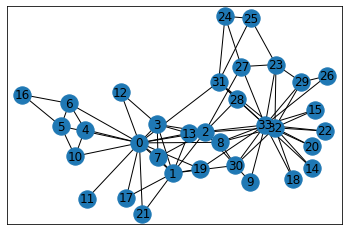

In [74]:
g = nx.karate_club_graph()
nx.draw_networkx(g)
info_icm = independent_cascade_model(g, [0], p=.01, seed=2)
print(info_icm)

In [ ]:
l = [0, 1, 2, 3]